In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dataset.csv')
print(df)

    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2         2       

In [3]:
print(df.head())

  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      

In [4]:
print(df.columns)

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')


In [5]:
df_encoded = df.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [7]:
print(df['GENDER'])

0      M
1      M
2      F
3      M
4      F
      ..
304    F
305    M
306    M
307    M
308    M
Name: GENDER, Length: 309, dtype: object


In [8]:
df_encoded['GENDER'] = df_encoded['GENDER'].map({'M':0,'F':1})

In [9]:
df_encoded.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


Encoding Categorical Data To Numerical Values 

In [10]:
df_encoded['LUNG_CANCER'] = df_encoded['LUNG_CANCER'].map({'YES':1, 'NO':0})

Split data set into features(X) and target(Y).

LUNG_CANCER column is the target and others are features.

In [11]:
X = df_encoded.drop('LUNG_CANCER', axis=1)

In [12]:
y = df_encoded['LUNG_CANCER']

Split your data into train and test dataset.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Model Training

In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
model = GaussianNB()

In [17]:
model.fit(X_train, y_train)

GaussianNB()

Prediction On Test Data 

In [18]:

y_pred = model.predict(X_test)


In [19]:
Input_data = [
    0,  # GENDER: M (0) for Male
    55,  # AGE: 55
    1,  # SMOKING: 1 (Yes)
    2,  # YELLOW_FINGERS: 2 (High severity)
    2,  # ANXIETY: 2 (High anxiety)
    1,  # PEER_PRESSURE: 1 (Moderate pressure)
    1,  # CHRONIC DISEASE: 1 (Yes)
    2,  # FATIGUE: 2 (High fatigue)
    1,  # ALLERGY: 1 (Present allergy)
    2,  # WHEEZING: 2 (Severe wheezing)
    2,  # ALCOHOL CONSUMING: 2 (Alcohol consumption)
    2,  # COUGHING: 2 (Severe coughing)
    2,  # SHORTNESS OF BREATH: 2 (Severe shortness of breath)
    2,  # SWALLOWING DIFFICULTY: 2 (Severe difficulty)
    2   # CHEST PAIN: 2 (Severe chest pain)
]


prediction = model.predict([Input_data])  # Pass the list as 2D array (1 sample, 15 features)

# Print the prediction
if prediction == 1:
    print("The prediction is: LUNG CANCER (YES)")
else:
    print("The prediction is: NO LUNG CANCER")

The prediction is: LUNG CANCER (YES)


c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Model Evaluation

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

Accuracy: 0.9570
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.97      0.99      0.98        86

    accuracy                           0.96        93
   macro avg       0.88      0.78      0.82        93
weighted avg       0.95      0.96      0.95        93

Confusion Matrix:
[[ 4  3]
 [ 1 85]]


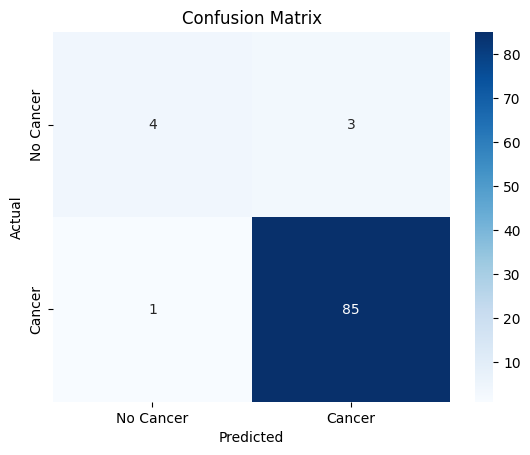

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualizing the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()